In [54]:
from ast import literal_eval

import matplotlib.pyplot as plt
import seaborn as sns
import torch
from rich import print as rprint
from safetensors.torch import load_model
from torch import nn

from analysis.common import alignment, plotsvals, sab, trajectories
from koopmann import aesthetics
from koopmann.data import (
    DatasetConfig,
    create_data_loader,
    get_dataset_class,
)
from koopmann.models import MLP, ResMLP
from koopmann.models.utils import parse_safetensors_metadata
from koopmann.utils import (
    compute_model_accuracy,
)
from koopmann.visualization import plot_decision_boundary

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
residual = True
model_name = "mnist_probed"

In [56]:
if residual:
    file_path = f"/scratch/nsa325/koopmann_model_saves/{model_name}_residual.safetensors"
    # model, _ = ResMLP.load_model(file_path)
    # Parse metadata
    metadata = parse_safetensors_metadata(file_path=file_path)

    # Load base model
    model = ResMLP(
        input_dimension=literal_eval(metadata["input_dimension"]),
        output_dimension=literal_eval(metadata["output_dimension"]),
        config=[512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512],
        nonlinearity=metadata["nonlinearity"],
        bias=literal_eval(metadata["bias"]),
        batchnorm=literal_eval(metadata["batchnorm"]),
    )
    insert_index = len(model.modules) - 1
    model.insert_layer(index=insert_index, out_features=512, nonlinearity="none")
    model.insert_layer(index=insert_index + 1, nonlinearity="none")

    # Load weights
    load_model(model, file_path, device="cpu")
else:
    file_path = f"/scratch/nsa325/koopmann_model_saves/{model_name}.safetensors"
    model, _ = MLP.load_model(file_path)
model.eval()
model.hook_model()
model.summary()


Layer (type (var_name))                            Param #
ResMLP (ResMLP)                                    --
+ Sequential (_features)                           --
|    + LinearLayer (0)                             --
|    |    + Sequential (layers)                    402,432
|    + ResidualBlock (1)                           --
|    |    + LinearLayer (fc1)                      263,168
|    |    + LinearLayer (fc2)                      263,168
|    + ResidualBlock (2)                           --
|    |    + LinearLayer (fc1)                      263,168
|    |    + LinearLayer (fc2)                      263,168
|    + ResidualBlock (3)                           --
|    |    + LinearLayer (fc1)                      263,168
|    |    + LinearLayer (fc2)                      263,168
|    + ResidualBlock (4)                           --
|    |    + LinearLayer (fc1)                      263,168
|    |    + LinearLayer (fc2)                      263,168
|    + ResidualBlock (5)        

In [57]:
metadata = parse_safetensors_metadata(file_path=file_path)
dataset_config = DatasetConfig(
    dataset_name=metadata["dataset"],
    num_samples=5_000,
    split="test",
    seed=21,
)
DatasetClass = get_dataset_class(name=dataset_config.dataset_name)
dataset = DatasetClass(config=dataset_config)
dataloader = create_data_loader(dataset, batch_size=1024)

In [58]:
rprint(f"Testing Accuracy: {compute_model_accuracy(model, dataset)}")

Testing Accuracy: 0.9868000149726868

BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=784, out_features=512, bias=True)
BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=512, out_features=512, bias=True)
BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=512, out_features=512, bias=True)
BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=512, out_features=512, bias=True)
BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=512, out_features=512, bias=True)
BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=512, out_features=512, bia

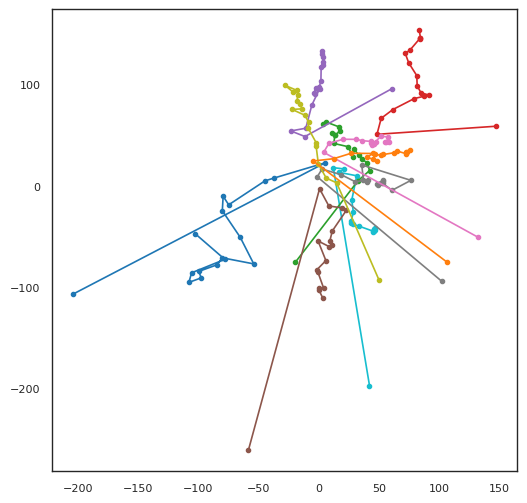

torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
svding layer 0
tensor([-5.7220e-06, -5.7220e-06, -2.6226e-06,  7.1526e-07,  9.5367e-07,
        -4.7684e-07,  1.5497e-06,  1.6093e-06, -5.9605e-08, -3.8743e-07,
         1.9521e-06,  3.1292e-07,  8.9407e-08,  8.0466e-07,  1.0431e-07,
         3.3528e-07,  1.9185e-07,  4.2096e-07,  8.1956e-08,  5.5879e-09,
         2.0489e-08,  5.6811e-08, -2.7008e-08,  5.3551e-08,  1.2573e-08,
        -7.9162e-09, -2.4680e-08, -1.1222e-07,  9.8022e-08,  8.8476e-08,
        -6.5658e-08,  2.8638e-08, -9.4762e-08,  1.7183e-07, -1.3388e-08])
tensor([2.4682e+01, 7.5408e+00, 3.0837e+00, 2.8721e+00, 2.1654e+00, 2.0826e+00,
        8.1246e-01, 6.4744e-01, 4.87

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


In [59]:
if residual:
    sab(model)
    trajectories(model, dataloader, 10, 1)
    images, labels = next(iter(dataloader))
    x = images[0]
    _ = model(x)
    acts, patts = model.get_fwd_acts_patts()
    acts = list(acts.values())
    patts = list(patts.values())
    JUSV = plotsvals(acts, patts, title="Test")
    alignment(acts, patts, title="Test", JUSV=JUSV)